# Частина третя: Аналіз датасет c Kaggle.com

У цій частині домашньої роботи ми ще більше заглибимося в бібліотеку `pandas` та розглянемо просунутіші функції.

Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на [Kaggle.com](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019). Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності). Після цього переходьте до завдання

Для виконання цієї частини домашнього завдання потрібно буде не тільки написати код, а й відповісти на супутні запитання. Там, де ви побачите виділений жирним шрифтом напис відповідь: потрібно буде вставити питання у файл і відповідь на нього.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import copy

# Task 1
Необхідно виконати:

* Прочитайте csv файл (використовуйте функцію read_csv)
* Виведіть перші п'ять рядків (використовується функція head)
* Виведіть розміри датасету (використовуйте атрибут shape)
* Відповідь: Про скільки книг зберігає дані датасет?

In [2]:
URL = "https://drive.google.com/file/d/1-5x6sbGPYItMOXWoGo4Mecn5MIB-sjHT/view?usp=sharing"
file_id=URL.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
base_df = pd.read_csv(dwn_url)
base_df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
base_df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
# Виведіть перші п'ять рядків (використовується функція head)

base_df.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
# Виведіть розміри датасету (використовуйте атрибут shape)

base_df.shape

(550, 7)

In [ ]:
# Про скільки книг зберігає дані датасет?

base_df.drop_duplicates(subset=['name'])

# Відповідь: 351 книга. Відповідно до кількості унікальних значень у колонці "name".

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


# Task 2
## Первинне дослідження даних
* Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
* Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
* Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
* Відповідь: Які є унікальні жанри?
* Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
* Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
* Відповідь: Максимальна ціна?
* Відповідь: Мінімальна ціна?
* Відповідь: Середня ціна?
* Відповідь: Медіанна ціна?

In [ ]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

base_df.isnull().sum()

# Чи є в якихось змінних пропуски? (Так / ні)
# Відповідь: Ні.

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [ ]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

base_df["genre"].unique()

# Які є унікальні жанри?
# Відповідь: 'Non Fiction', 'Fiction'.

array(['Non Fiction', 'Fiction'], dtype=object)

<Axes: ylabel='Frequency'>

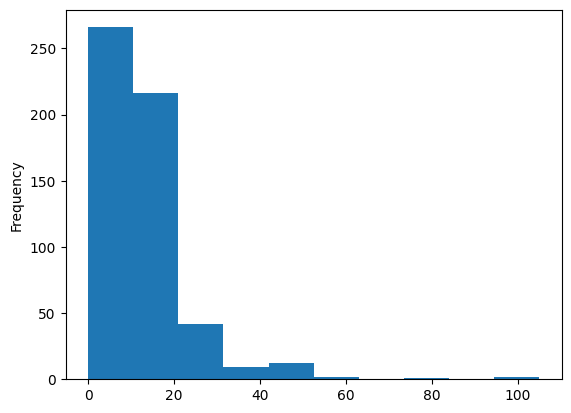

In [ ]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

base_df.price.plot(kind='hist')



In [ ]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

base_df.agg({"price": ["min", "max", "mean", "median"]})

# Максимальна ціна?
# Відповідь: 105.0

# Мінімальна ціна?
# Відповідь: 0.0

# Середня ціна?
# Відповідь: 13.1

# Медіанна ціна?
# Відповідь: 11.0

,price
min,0.0
max,105.0
mean,13.1
median,11.0


# Task 3
## Пошук та сортування даних
* Відповідь: Який рейтинг у датасеті найвищий?
* Відповідь: Скільки книг мають такий рейтинг?
* Відповідь: Яка книга має найбільше відгуків?
* Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
* Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
* Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію `isin`)?
* І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію `sort_values`).
* Відповідь: Яка книга остання у відсортованому списку?

In [ ]:
# Який рейтинг у датасеті найвищий?

base_df.user_rating.max()

# Відповідь: 4.9

4.9

In [ ]:
# Скільки книг мають такий рейтинг?

base_df.user_rating.eq(base_df.user_rating.max()).sum()

# Відповідь: 52

52

In [ ]:
# Яка книга має найбільше відгуків?

base_df.sort_values(by="reviews", ascending=False).head(1)

# Відповідь: "Where the Crawdads Sing" by Delia Owens.

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [ ]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

tmp = base_df.loc[base_df['year'].isin([2015])]
tmp.sort_values(by="price", ascending=False).head(1)

# Відповідь: "Publication Manual of the American Psychological Association, 6th Edition" by American Psychological Association.

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [ ]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

len(base_df.loc[(base_df['genre']=="Fiction") & (base_df['year']==2010)])

# Відповідь: 20

20

In [ ]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

len(base_df.loc[
    base_df.user_rating.eq(4.9) &
    base_df.year.isin([2011, 2010])
  ]
)

# Відповідь: 1

1

In [ ]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

base_df.loc[
    base_df.price.lt(8) &
    base_df.year.isin([2015])
  ].sort_values(by="price")

# Яка книга остання у відсортованому списку?

# Відповідь: Old School (Diary of a Wimpy Kid #10) by Jeff Kinney.

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


# Task 4
## Агрегування даних та з'єднання таблиць
Остання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, `pandas` робить усі операції простими та зрозумілими.

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції `groupby` та `agg`, для підрахунку мінімальних та максимальних значень використовуйте `max` та `min`). Не беріть усі стовпці, виберіть тільки потрібні вам.

* Відповідь: Максимальна ціна для жанру Fiction.
* Відповідь: Мінімальна ціна для жанру Fiction.
* Відповідь: Максимальна ціна для жанру Non Fiction.
* Відповідь: Мінімальна ціна для жанру Non Fiction.

* Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції `groupby` та `agg`, для підрахунку кількості використовуйте `count`). Не беріть усі стовпці, виберете тільки потрібні.

* Відповідь: Якої розмірності вийшла таблиця?
* Відповідь: Який автор має найбільше книг?
* Відповідь: Скільки книг цього автора?

* Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції `groupby` та `agg`, для підрахунку середнього значення використовуйте `mean`). Не беріть усі стовпці, виберете тільки потрібні.

* Відповідь: У якого автора середній рейтинг мінімальний?
* Відповідь: Який у цього автора середній рейтинг?

* З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію `concat` з параметром `axis=1`). Збережіть результат у змінну.

* Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію `sort_values`).

* Відповідь: Який автор перший у списку?

In [ ]:
# Максимальна ціна для жанру Fiction.

base_df[
    base_df.genre.isin(["Fiction"])
  ].price.max()

# Відповідь: 82

82

In [ ]:
# Мінімальна ціна для жанру Fiction.

base_df[
    base_df.genre.isin(["Fiction"])
  ].price.min()

# Відповідь: 0

0

In [ ]:
# Максимальна ціна для жанру Non Fiction.

base_df[
    base_df.genre.isin(["Non Fiction"])
  ].price.max()

# Відповідь: 105

105

In [ ]:
# Мінімальна ціна для жанру Non Fiction.

base_df[
    base_df.genre.isin(["Non Fiction"])
  ].price.min()

# Відповідь: 0

0

In [38]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
# Не беріть усі стовпці, виберіть тільки потрібні.

books_df = copy.deepcopy(base_df)[["author", "name"]] \
.groupby(["author"], as_index = False) \
.agg(number_of_books=('name', 'count')) \
.sort_values("number_of_books", ascending=False)

books_df

# Якої розмірності вийшла таблиця?
# Відповідь: 248 rows × 2 columns

# Який автор має найбільше книг?
# Відповідь: Jeff Kinney.

# Скільки книг цього автора?
# Відповідь: 12.

,author,number_of_books
120,Jeff Kinney,12
92,Gary Chapman,11
226,Suzanne Collins,11
197,Rick Riordan,11
11,American Psychological Association,10
...,...,...
61,David Grann,1
143,Larry Schweikart,1
62,David McCullough,1
141,Khaled Hosseini,1


In [4]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
# (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
# Не беріть усі стовпці, виберете тільки потрібні.

rating_df = copy.deepcopy(base_df)[["author", "user_rating"]] \
.groupby(["author"], as_index = False) \
.agg(mean_rating=('user_rating', 'mean')) \
.sort_values("mean_rating", ascending=True)

rating_df

# Якої розмірності вийшла таблиця?
# Відповідь: 248 rows × 2 columns

# У якого автора середній рейтинг мінімальний?
# Відповідь: Donna Tartt.

# Який у цього автора середній рейтинг?
# Відповідь: 3.9

,author,mean_rating
71,Donna Tartt,3.9
100,Gillian Flynn,4.0
171,Muriel Barbery,4.0
90,Gallup,4.0
109,Ian K. Smith M.D.,4.1
...,...,...
146,Lin-Manuel Miranda,4.9
178,Patrick Thorpe,4.9
173,Nathan W. Pyle,4.9
26,Bill Martin Jr.,4.9


In [5]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
# (Використовуйте функцію concat з параметром axis=1).
# Збережіть результат у змінну.


merged_df = pd.concat([books_df, rating_df["mean_rating"].round(1)], axis=1)

# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
# (використовуйте функцію sort_values).

merged_df.sort_values(["number_of_books", "mean_rating"], ascending=[True, True]).head(1)

# Який автор перший у списку?
# Відповідь: Muriel Barbery.

,author,number_of_books,mean_rating
171,Muriel Barbery,1,4.0


[Text(0.5, 1.0, 'Jeff Kinney user rating')]

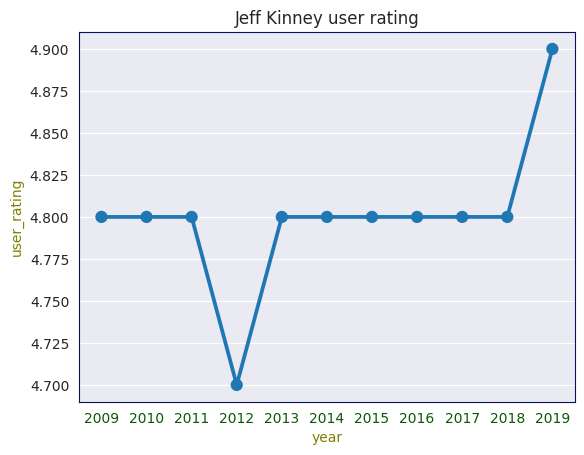

In [61]:
tmp = base_df.loc[
    base_df.author.isin(["Jeff Kinney"])
  ]

plot = sns.pointplot(x="year", y="user_rating", data=tmp)

plot.set(title='Jeff Kinney user rating')

[Text(0.5, 1.0, 'Top 10 Authors')]

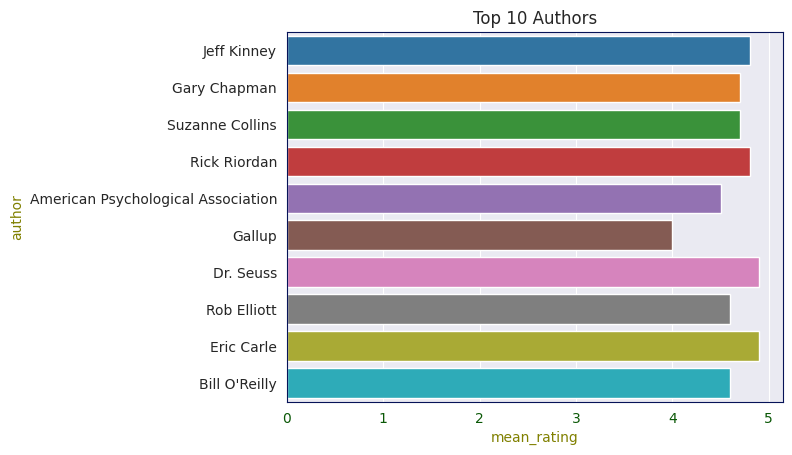

In [57]:
plot = sns.barplot(x="mean_rating", y="author", data=merged_df.head(10))

plot.set(title='Top 10 Authors')

[Text(0.5, 1.0, 'Genre user rating')]

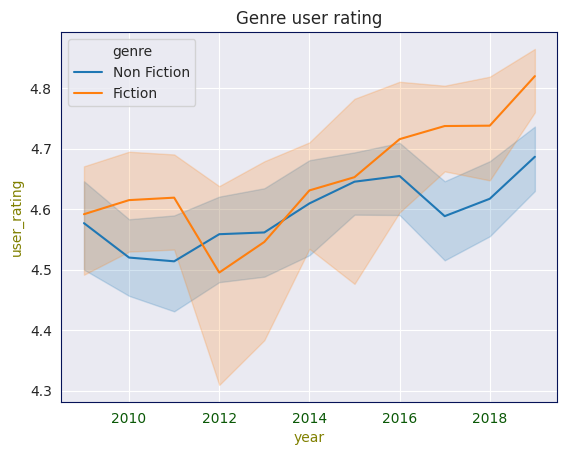

In [73]:
sns.set_style("darkgrid",  {'axes.labelcolor':"(0.5,0.5,0)", 'axes.edgecolor':'#061358',
'xtick.color':'#0A5806'})

plot = sns.lineplot(x='year', y='user_rating', hue="genre", data=base_df)

plot.set(title='Genre user rating')

[Text(0.5, 1.0, 'Genre reviews')]

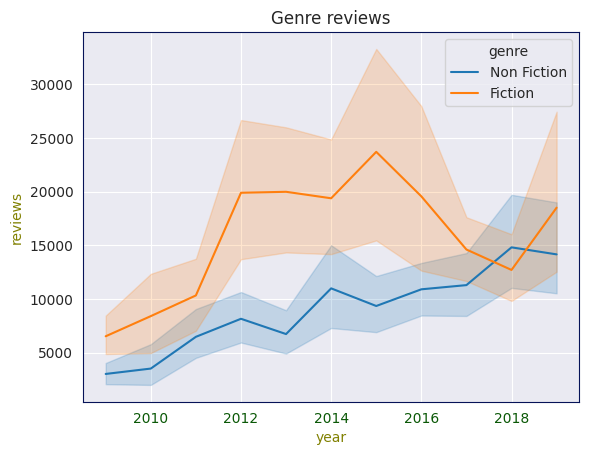

In [77]:
sns.set_style("darkgrid",  {'axes.labelcolor':"(0.5,0.5,0)", 'axes.edgecolor':'#061358',
'xtick.color':'#0A5806'})

plot = sns.lineplot(x='year', y='reviews', hue="genre", data=base_df)

plot.set(title='Genre reviews')